In [2]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Distribution tell us about the shape and spread of data.

In [3]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [ ]:
# So, here we just have series the left side is the index and the right side is the values
df_DA_US['salary_year_avg']

36       NaN
68       NaN
73       NaN
79       NaN
93       NaN
          ..
785603   NaN
785626   NaN
785685   NaN
785703   NaN
785705   NaN
Name: salary_year_avg, Length: 67816, dtype: float64

pandas/matplotlib:

- Takes all the values from that Series (the salaries),

- Divides the salary range into bins (like 0–10k, 10k–20k, etc.),

- Counts how many values fall into each bin,

- And plots that count (frequency) on the y-axis.

So the “how many times each value range appears” is computed by the histogram function, not stored in the Series index.

Text(0, 0.5, 'Number of Jobs')

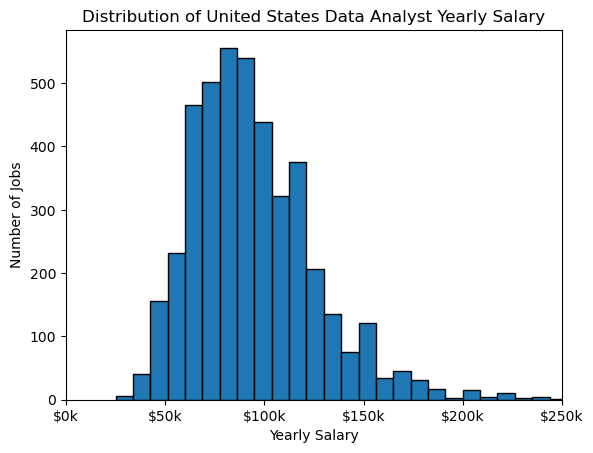

In [14]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter (lambda x, pos: f'${int(x/1000)}k'))  

plt.title('Distribution of United States Data Analyst Yearly Salary')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')